# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import random_split


c:\Users\Atlas\anaconda3\envs\icenv\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Belirtilen yordam bulunamadı'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
train_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.RandomRotation(10),
])
test_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),

])



# Create training set and define training dataloader
## YOUR CODE HERE #
data=torchvision.datasets.MNIST(root='./data',download=True,train=True,transform=train_transform)

train_size = int(0.8 * len(data))
valid_size = len(data) - train_size 
data_train, data_valid = random_split(data, [train_size, valid_size],generator=torch.Generator().manual_seed(37))

train_loader=DataLoader(data_train,batch_size=128,shuffle=True)
valid_loader=DataLoader(data_valid,batch_size=128,shuffle=True)

# Create test set and define test dataloader
data_test=torchvision.datasets.MNIST(root='./data',download=True,train=False,transform=test_transform)
test_loader=DataLoader(data_test,batch_size=128,shuffle=True)

## YOUR CODE HERE ##

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

1. We extract the pixel values ​​into tensor format using Torch.ToTensor. Pytorch expects inputs as tensor. 
2. By performing z score normalization, we update the pixels according to how standard deviation each pixel is from the mean. In this way, the effect of outliers is reduced since all pixel values ​​are scaled according to the standard deviation. In this way, two images with different color changes are less likely to be detected incorrectly. 

3. By giving random rotation, we prevent the training data set from focusing on only certain pixels, so it can detect different types of images better.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


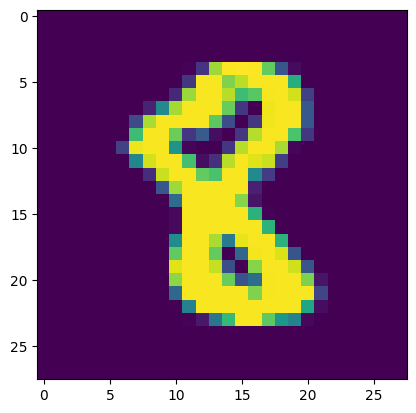

2


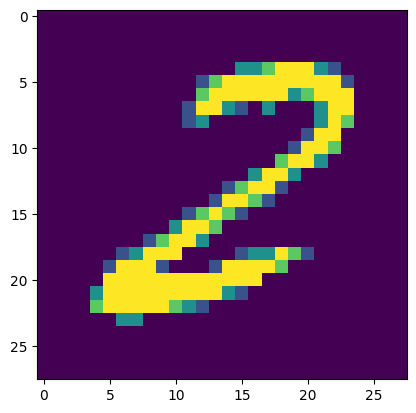

9


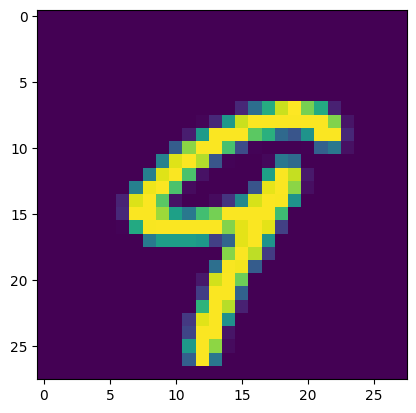

9


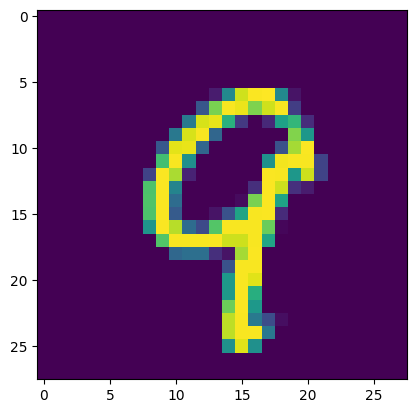

7


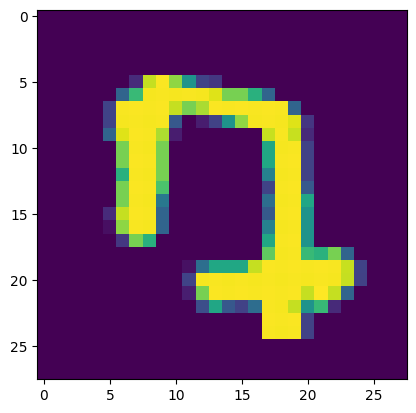

In [4]:
# Explore data
show5(test_loader)
## YOUR CODE HERE ##

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
input_size=784
hidden_sizes=[512,128]
output_size=10

In [6]:
## YOUR CODE HERE ##
class Model(nn.Module):
    def __init__(self,input_size,hidden_sizes,output_size):
        super(Model,self).__init__()
        self.fc1=torch.nn.Linear(input_size,hidden_sizes[0])
        self.fc2=torch.nn.Linear(hidden_sizes[0],hidden_sizes[1])
        self.fc3=torch.nn.Linear(hidden_sizes[1],output_size)
    
    def forward(self,x):
        x=x.view(-1,28*28)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.log_softmax(self.fc3(x),dim=1)
        return x
        

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
model=Model(input_size,hidden_sizes,output_size)

In [9]:
## YOUR CODE HERE ##
optimizer=torch.optim.Adam(model.parameters(),lr=0.05)
criterion=torch.nn.NLLLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
def train_model(model, criterion, optimizer, epochs, train_loader, valid_loader, device):
    
    model.to(device)
    train_losses = []
    valid_losses = []
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model.forward(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        model.eval()
        running_valid_loss = 0.0
        accuracy = 0.0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model.forward(images)
                valid_loss = criterion(outputs, labels)
                running_valid_loss += valid_loss.item()

                ps = torch.exp(outputs)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
        train_loss = running_train_loss / len(train_loader)
        valid_loss = running_valid_loss / len(valid_loader)
        accuracy = accuracy / len(valid_loader)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print(f"Epoch {epoch+1}/{epochs}.. "
              f"Train loss: {train_loss:.3f}.. "
              f"Valid loss: {valid_loss:.3f}.. "
              f"Valid accuracy: {accuracy:.3f}")

    return model, optimizer.state_dict(), train_losses, valid_losses


In [11]:
device="cuda"
model,optimizer_dict,train_losses,valid_losses=train_model(model,criterion,optimizer,10,train_loader,valid_loader,device)

Epoch 1/10.. Train loss: 2.058.. Valid loss: 1.050.. Valid accuracy: 0.677
Epoch 2/10.. Train loss: 0.800.. Valid loss: 0.862.. Valid accuracy: 0.700
Epoch 3/10.. Train loss: 0.733.. Valid loss: 0.681.. Valid accuracy: 0.747
Epoch 4/10.. Train loss: 0.777.. Valid loss: 0.858.. Valid accuracy: 0.691
Epoch 5/10.. Train loss: 0.758.. Valid loss: 0.746.. Valid accuracy: 0.743
Epoch 6/10.. Train loss: 0.713.. Valid loss: 0.728.. Valid accuracy: 0.739
Epoch 7/10.. Train loss: 0.736.. Valid loss: 0.779.. Valid accuracy: 0.754
Epoch 8/10.. Train loss: 0.755.. Valid loss: 0.721.. Valid accuracy: 0.757
Epoch 9/10.. Train loss: 0.797.. Valid loss: 0.836.. Valid accuracy: 0.749
Epoch 10/10.. Train loss: 0.771.. Valid loss: 0.817.. Valid accuracy: 0.750


In [12]:
def plot_loss(train_loss,valid_loss,title):
    epochs = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(9,4))
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, valid_loss, label='Validation Loss')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()


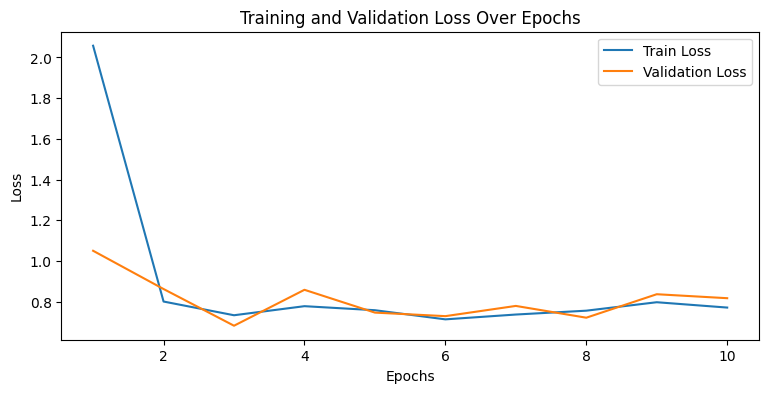

In [13]:
plot_loss(train_losses,valid_losses,title="Training and Validation Loss Over Epochs")

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
def evaluate_model(model, criterion, test_loader, device):
    model.eval()
    test_loss = 0.0
    accuracy=0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            ps = torch.exp(outputs)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    test_loss = test_loss / len(test_loader)
    accuracy = accuracy / len(test_loader)

    print(f"Test loss: {test_loss:.3f}.. "
          f"Test accuracy: {accuracy:.3f}")

    return test_loss, accuracy

In [15]:
evaluate_model(model,criterion,test_loader,device)

Test loss: 0.705.. Test accuracy: 0.765


(0.7047516609294505, 0.7648338607594937)

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [18]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.005,betas=(0.95,0.999))


In [19]:
## YOUR CODE HERE ##
model,optimizer_dict,train_losses,valid_losses=train_model(model, criterion, optimizer, 15, train_loader, valid_loader, device)

Epoch 1/15.. Train loss: 0.659.. Valid loss: 0.637.. Valid accuracy: 0.769
Epoch 2/15.. Train loss: 0.613.. Valid loss: 0.616.. Valid accuracy: 0.782
Epoch 3/15.. Train loss: 0.600.. Valid loss: 0.599.. Valid accuracy: 0.790
Epoch 4/15.. Train loss: 0.579.. Valid loss: 0.575.. Valid accuracy: 0.802
Epoch 5/15.. Train loss: 0.566.. Valid loss: 0.568.. Valid accuracy: 0.805
Epoch 6/15.. Train loss: 0.554.. Valid loss: 0.570.. Valid accuracy: 0.812
Epoch 7/15.. Train loss: 0.539.. Valid loss: 0.540.. Valid accuracy: 0.823
Epoch 8/15.. Train loss: 0.517.. Valid loss: 0.531.. Valid accuracy: 0.830
Epoch 9/15.. Train loss: 0.510.. Valid loss: 0.524.. Valid accuracy: 0.841
Epoch 10/15.. Train loss: 0.502.. Valid loss: 0.521.. Valid accuracy: 0.845
Epoch 11/15.. Train loss: 0.493.. Valid loss: 0.518.. Valid accuracy: 0.848
Epoch 12/15.. Train loss: 0.485.. Valid loss: 0.490.. Valid accuracy: 0.850
Epoch 13/15.. Train loss: 0.481.. Valid loss: 0.501.. Valid accuracy: 0.844
Epoch 14/15.. Train l

In [20]:
evaluate_model(model,criterion,test_loader,device)

Test loss: 0.434.. Test accuracy: 0.869


(0.43379914817176285, 0.8689675632911392)

## Saving your model
Using `torch.save`, save your model for future loading.

In [21]:
## YOUR CODE HERE ##
epochs=len(train_losses)
checkpoint={
    "model":model.state_dict(),
    "criterion":criterion,
    "optimizer_state_dict":optimizer_dict,
    "num_epochs":epochs,
    "input_layer":input_size,
    "hidden_layers":(hidden_sizes[0],hidden_sizes[1]),
    "output_layer":output_size
}

In [23]:
torch.save(checkpoint,"checkpoint.pth")